<a href="https://colab.research.google.com/github/mahesh-keswani/pytorch-example-notebook/blob/main/1_PytorchLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# lets generate data first

# 20 sample points
N = 30

# uniformly distributed data with range [-5, 5]
X = np.random.random(N) * 10 - 5

# gaussian noise centered around 0 with variance of 0.5
gaussianNoise = np.random.randn(N) * 0.5

# our Y
trueSlope = 1
trueIntercept = -1
Y = trueSlope * X + trueIntercept + gaussianNoise 

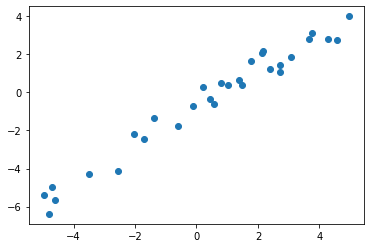

In [3]:
plt.scatter(X, Y);

In [4]:
# Say you had the data as (X,Y) which are numpy arrays, but pytorch doesn't work with numpy arrays, it works with Torch Tensors,
# so some conversion has to take place before feeding the data.
# Also, By default, pytorch creates your variables as float32, but numpy creates it as float64 as by-default.
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [5]:
# Now lets create linear model
#               input_features, output_dim
model = nn.Linear(1, 1)

In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD( model.parameters(), lr = 0.1 )

In [7]:
# Now we have model, loss, optimizer and data
# Now we are ready for training loop.

EPOCHS = 30
losses = []
for i in range(EPOCHS):
    # pytorch accumulates the gradients during backpropagation, (we will cover this in-more depth in future notebooks)
    optimizer.zero_grad()

    # even though model is an object of nn.Linear, we can call it as a function.
    # As model expects the data in Torch Tensor format, it also returns the Torch Tensor and not numpy arrays
    outputs = model(inputs)

    # again, the criterion is an object, but we are using it like a function
    loss = criterion(outputs, targets)

    # if you want something from pytorch which is single number and not an array (like loss in single epoch), 
    # then you should use .item() function.
    # But if you want something from pytorch which is an array (like outputs from model) in the numpy format
    # outputs = model(inputs).detach().numpy()
    # detach from graph first and then convert it to numpy array

    losses.append( loss.item() )

    # this actually calculates the gradients
    loss.backward()

    # this actually updates the parameters
    optimizer.step()

    print(f"Epoch {i + 1}/{EPOCHS}, Loss {loss.item()}")

Epoch 1/30, Loss 4.515284061431885
Epoch 2/30, Loss 2.878399133682251
Epoch 3/30, Loss 1.886596441268921
Epoch 4/30, Loss 1.2804961204528809
Epoch 5/30, Loss 0.9071716666221619
Epoch 6/30, Loss 0.67557293176651
Epoch 7/30, Loss 0.5309726595878601
Epoch 8/30, Loss 0.4401784837245941
Epoch 9/30, Loss 0.38288649916648865
Epoch 10/30, Loss 0.34657958149909973
Epoch 11/30, Loss 0.3234867751598358
Epoch 12/30, Loss 0.3087528645992279
Epoch 13/30, Loss 0.29932722449302673
Epoch 14/30, Loss 0.29328399896621704
Epoch 15/30, Loss 0.2894022762775421
Epoch 16/30, Loss 0.2869049310684204
Epoch 17/30, Loss 0.285296231508255
Epoch 18/30, Loss 0.2842588424682617
Epoch 19/30, Loss 0.28358927369117737
Epoch 20/30, Loss 0.28315678238868713
Epoch 21/30, Loss 0.2828773260116577
Epoch 22/30, Loss 0.2826964557170868
Epoch 23/30, Loss 0.282579630613327
Epoch 24/30, Loss 0.28250396251678467
Epoch 25/30, Loss 0.2824549674987793
Epoch 26/30, Loss 0.2824232876300812
Epoch 27/30, Loss 0.28240278363227844
Epoch 28/

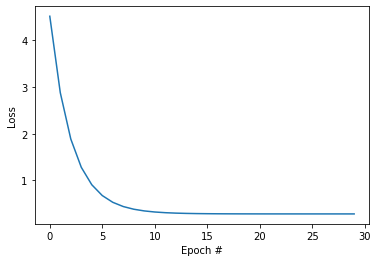

In [10]:
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.plot(losses);

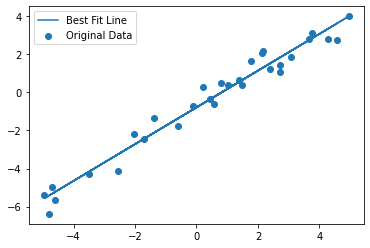

In [11]:
# Now inorder to make predictions
predictions = model(inputs).detach().numpy()

# Now lets use these predictions in-order to see the approximation of best-fit line
plt.scatter(X, Y, label = "Original Data")
plt.plot(X, predictions, label = "Best Fit Line")
plt.legend();

In [12]:
# The other way to get the numpy array from the pytorch
with torch.no_grad():
    predictions = model(inputs).numpy()

print(predictions)

[[ 1.2911712 ]
 [-5.4215074 ]
 [ 2.826068  ]
 [ 3.6276474 ]
 [ 1.8372675 ]
 [-0.90827703]
 [ 3.9815922 ]
 [-0.23265588]
 [-0.58691424]
 [-0.03206247]
 [-2.443985  ]
 [ 0.63529396]
 [-0.3509506 ]
 [ 2.1657696 ]
 [-3.2406979 ]
 [-1.3630816 ]
 [ 0.1892004 ]
 [-2.738169  ]
 [-5.316417  ]
 [ 1.8167914 ]
 [ 1.5238501 ]
 [ 0.92228484]
 [-2.1306553 ]
 [-5.5717444 ]
 [-4.156907  ]
 [ 3.3524466 ]
 [ 2.7394576 ]
 [ 1.2735621 ]
 [ 0.54204834]
 [-5.235377  ]]


In [13]:
# Now lets check the actual weight and bias of the model
predictedSlope = model.weight.data.numpy()
predictedIntercept = model.bias.data.numpy()

print("True slope and true intercept")
print(trueSlope, trueIntercept)

print("=" * 30)

print("Predicted slope and predicted intercept")
print(predictedSlope, predictedIntercept)

True slope and true intercept
1 -1
Predicted slope and predicted intercept
[[0.96497655]] [-0.791114]
